# Automatic WhatsApp Analyzer (String-Split Method)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

✅ File selected: C:/Users/HP/OneDrive/Desktop/Python Script/WhatsApp Chat with Oil -- Terrorism -- Slavery.txt
✅ WhatsApp chat parsed successfully! Total messages: 12095

--- Top 5 Active People ---
Name
Omo Jesu        3886
Farsan Batie    3380
genghis         1179
Adigun          1163
HakRaj          1083
Name: count, dtype: int64


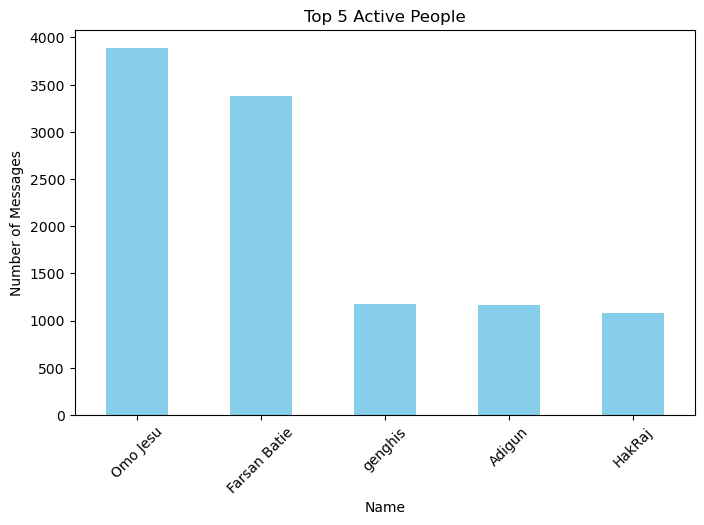


--- Top 5 Longest Messages ---


,Name,Message,Length of Message
8794,Meta AI,"Libya is located in the continent of Africa, s...",423
2147,Meta AI,"No Skynet here, just a friendly AI assistant! ...",409
3660,Meta AI,You'd like me to translate something! What wou...,355
6483,Farsan Batie,https://festival.afrifoodnetwork.com/event-reg...,350
1870,Meta AI,"""The Plan"" is a song by American rapper Travis...",347



--- Messages per Day (First 10 Days) ---
Date
2025-01-22    253
2025-01-23     34
2025-01-24     27
2025-01-26     12
2025-01-29      7
2025-01-30     71
2025-02-05     31
2025-02-06    135
2025-02-08     11
2025-02-09      7
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_16936\1115060649.py:63: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


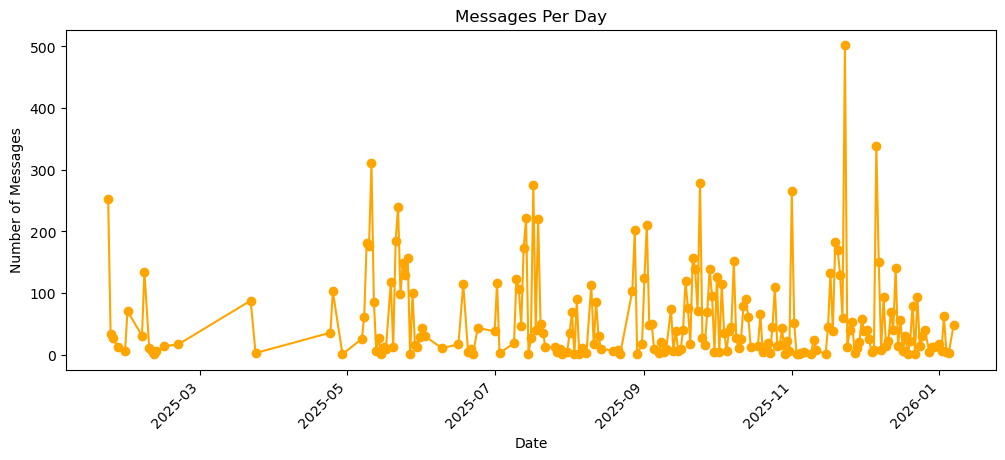


✅ Cleaned chat saved as 'cleaned_whatsapp_chat.csv'. You can now run NLP on it.


In [3]:
def run_whatsapp_analysis():
    # Hide main Tk window
    root = Tk()
    root.withdraw()

    #Ask user to select WhatsApp export
    file_path = filedialog.askopenfilename(title="Select WhatsApp Chat .txt file", filetypes=[("Text files", "*.txt")])
    if not file_path:
        print("❌ No file selected. Please run the cell again and select a WhatsApp .txt file.")
        return

    print(f"✅ File selected: {file_path}")

    #Parse chat
    cleaned_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        dataset = f.readlines()

    for line in dataset:
        try:
            date = line.split(',')[0]                   # Date
            line2 = line[len(date):]                    # Remove date
            time = line2.split('-')[0][2:]             # Time
            line3 = line2[len(time):]                  # Remove time
            name = line3.split(':')[0][4:]             # Name
            line4 = line3[len(name):]                  # Remove name
            message = line4[6:-1]                      # Message

            if date.strip() and time.strip() and name.strip() and message.strip():
                cleaned_data.append([date.strip(), time.strip(), name.strip(), message.strip()])
        except Exception:
            continue

    df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Name', 'Message'])
    df['Length of Message'] = df['Message'].str.len()

    if df.empty:
        print("❌ No messages were parsed. Please check your WhatsApp export format.")
        return

    print(f"✅ WhatsApp chat parsed successfully! Total messages: {len(df)}")

    #Basic Stats + Visualizations
    # Top 5 active people
    top_senders = df['Name'].value_counts().head(5)
    print("\n--- Top 5 Active People ---")
    print(top_senders)
    
    plt.figure(figsize=(8,5))
    top_senders.plot(kind='bar', color='skyblue')
    plt.title("Top 5 Active People")
    plt.ylabel("Number of Messages")
    plt.xlabel("Name")
    plt.xticks(rotation=45)
    plt.show()
    
    # Top 5 longest messages
    top_long_messages = df.sort_values('Length of Message', ascending=False).head(5)
    print("\n--- Top 5 Longest Messages ---")
    display(top_long_messages[['Name','Message','Length of Message']])
    
    # Messages per day
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    messages_per_day = df['Date'].value_counts().sort_index()
    print("\n--- Messages per Day (First 10 Days) ---")
    print(messages_per_day.head(10))
    
    plt.figure(figsize=(12,5))
    messages_per_day.plot(kind='line', marker='o', color='orange')
    plt.title("Messages Per Day")
    plt.ylabel("Number of Messages")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.show()
    
    # Save cleaned CSV
    cleaned_csv_path = "cleaned_whatsapp_chat.csv"
    df.to_csv(cleaned_csv_path, index=False)
    print(f"\n✅ Cleaned chat saved as '{cleaned_csv_path}'. You can now run NLP on it.")

#Run the analyzer
run_whatsapp_analysis()